## COVID-19

Our world in data 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

##### Gather data from  https://ourworldindata.org/coronavirus-source-data

In [61]:
df_world = pd.read_csv('https://covid.ourworldindata.org/data/full_data.csv', parse_dates=['date']).set_index(['location','date']).sort_index()
df_world

new_cases  new_deaths  total_cases  total_deaths
location    date                                                        
Afghanistan 2020-02-25        NaN         NaN            1           NaN
            2020-02-26        0.0         NaN            1           NaN
            2020-02-27        0.0         NaN            1           NaN
            2020-02-28        0.0         NaN            1           NaN
            2020-02-29        0.0         NaN            1           NaN
...                           ...         ...          ...           ...
World       2020-03-10     4119.0       201.0       113702        4012.0
            2020-03-11     4611.0       275.0       118319        4292.0
            2020-03-12     6936.0       317.0       125260        4613.0
            2020-03-13     7488.0       338.0       132758        4956.0
            2020-03-14     9766.0       434.0       142539        5393.0

[2407 rows x 4 columns]

add column days with number of days since more than `thresh` cases per country:

In [77]:
thresh = 100
df_world['days'] = df_world.groupby(level=[0,1]).filter(lambda x: x['total_cases']>thresh).groupby(level=0).cumcount() + 1
df_world

new_cases  new_deaths  total_cases  total_deaths  days
location    date                                                              
Afghanistan 2020-02-25        NaN         NaN            1           NaN   NaN
            2020-02-26        0.0         NaN            1           NaN   NaN
            2020-02-27        0.0         NaN            1           NaN   NaN
            2020-02-28        0.0         NaN            1           NaN   NaN
            2020-02-29        0.0         NaN            1           NaN   NaN
...                           ...         ...          ...           ...   ...
World       2020-03-10     4119.0       201.0       113702        4012.0  50.0
            2020-03-11     4611.0       275.0       118319        4292.0  51.0
            2020-03-12     6936.0       317.0       125260        4613.0  52.0
            2020-03-13     7488.0       338.0       132758        4956.0  53.0
            2020-03-14     9766.0       434.0       142539        5393.0  54.0

[2407 rows x 5 columns]

In [43]:
df
df_world['days'] = df_world.groupby(level=0).cumcount() + 1
df_world

new_cases  new_deaths  total_cases  total_deaths  days
location    date                                                              
Afghanistan 2020-02-25        NaN         NaN            1           NaN     1
            2020-02-26        0.0         NaN            1           NaN     2
            2020-02-27        0.0         NaN            1           NaN     3
            2020-02-28        0.0         NaN            1           NaN     4
            2020-02-29        0.0         NaN            1           NaN     5
...                           ...         ...          ...           ...   ...
World       2020-03-10     4119.0       201.0       113702        4012.0    50
            2020-03-11     4611.0       275.0       118319        4292.0    51
            2020-03-12     6936.0       317.0       125260        4613.0    52
            2020-03-13     7488.0       338.0       132758        4956.0    53
            2020-03-14     9766.0       434.0       142539        5393.0    54

[2407 rows x 5 columns]

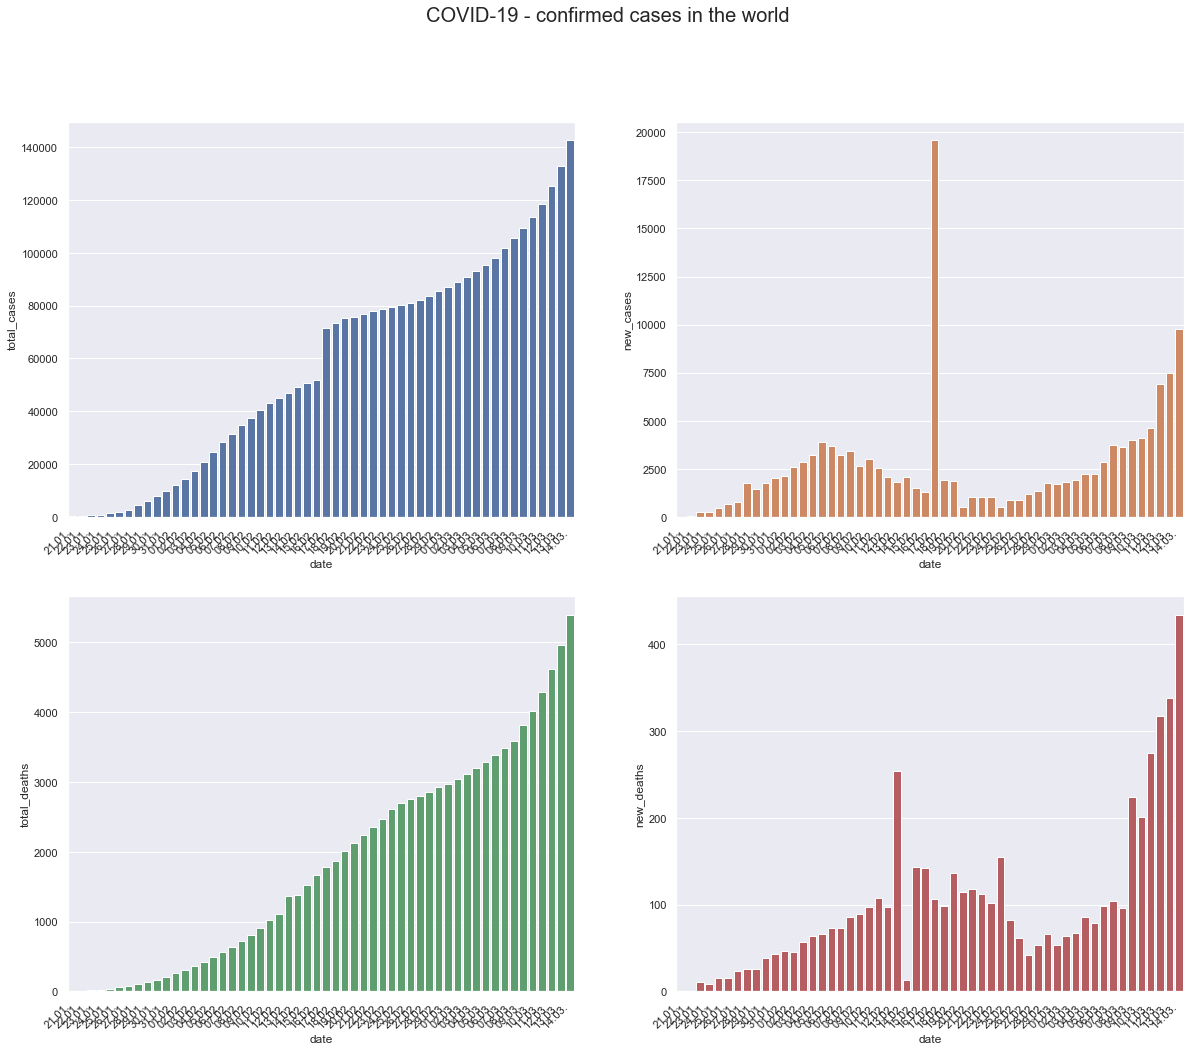

In [44]:
fig, ax = plt.subplots(2,2,figsize=(20,16))
df_plot_data = df_world.loc['World']
for i, ctype in enumerate(['total_cases', 'new_cases', 'total_deaths', 'new_deaths'], 1):
    plt.subplot(2,2,i)
    ax = sns.barplot(data=df_plot_data, x=df_plot_data.index, y=ctype, color=str('C' + str(i-1)))
    xticks = [xdate.strftime('%d.%m.') for xdate in df_plot_data.index]
    _ =ax.set_xticklabels(xticks, rotation=45, ha='right')
_ = plt.suptitle('COVID-19 - confirmed cases in the world',fontsize=20)


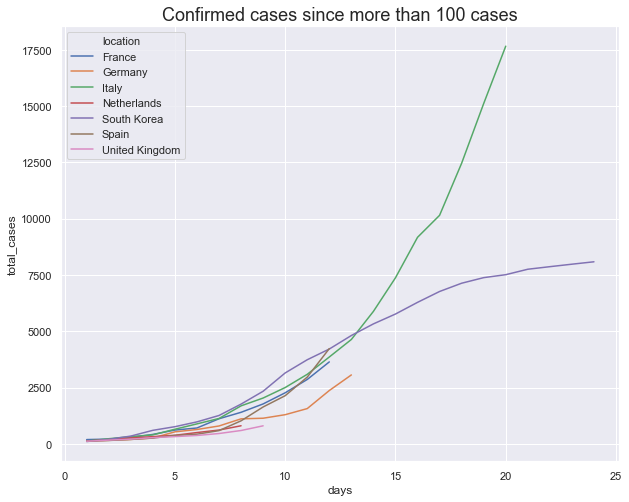

In [76]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
df_plot_data = df_world.loc[['Italy','Germany','Spain', 'Netherlands','France','South Korea', 'United Kingdom']].dropna(subset=['days'])
df_plot_data = df_plot_data.reset_index()
sns.lineplot(data=df_plot_data, x='days', y='total_cases', hue='location')
_ = ax.set_title("Confirmed cases since more than {} cases".format(thresh),fontsize=18)